Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

#Paracaidista en un atmosfera no uniforme.
En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

$$
P=P_0 e^{-\frac{Mgy}{kT}}
$$
$P_0=1atm$ es la presión de la atmósfera a nivel del mar
M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
g es la aceleración de la gravedad
$k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
$T$ es la temperatura de la atmósfera en kelvin
$NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.
Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$

Las fuerzas que actuan sobre el paracaidista son: El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
$$

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
$$
donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

Elaborar una gráfica de la densidad como función de la altura.
Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:
$m=60kg$, $A=0.3m^2$, $h=30km$.
$m=60kg$, $A=0.3m^2$, $h=40km$.
$m=60kg$, $A=0.3m^2$, $h=50km$.
$m=60kg$, $A=0.3m^2$, $h=60km$.
$m=60kg$, $A=0.3m^2$, $h=70km$.
Con la solucion de la ecuacion diferencial, elaborar una gráfica de.
la posición como función del tiempo.
La velocidad como función del tiempo.
La velocidad como función de la posición
Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

Realice un grafico de la velocidad maxima como función de la altura de caida.
Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
$$
donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$

Solucione la ecuación diferencial para este caso.

In [403]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy as sp
from scipy.interpolate import CubicSpline

In [404]:
#1
def f(y, p0, lamda):
  p = p0 * np.exp(-y/lamda)
  return p

In [405]:
p0 = 1.29 # kg/m^3
M = 0.0288 # Kg/MOL
g = 9.8 # m/(s^2)
k = 1.3805*10**(-23) #J/K constante de botlzman 
N_A = 6.0225 * 10**(23) # 1 mol
lamda = 7482.2 #metros 

y = np.linspace(0, 10000, 10001)
x = f(y, p0, lamda)

No handles with labels found to put in legend.


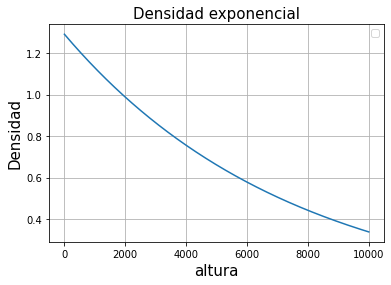

In [406]:
plt.plot(y, x)
plt.title("Densidad exponencial", size = 15)
plt.legend()
plt.xlabel("altura", size = 15)
plt.ylabel("Densidad", size = 15)
plt.grid()

In [407]:
def edo(cte, t, params):
  p0 = params[0]
  A = params[1]
  delta = params[2]
  lamda = params[3]
  m = params[4]
  g = params[5]

  k0 = (p0 * A * delta)/(2 * m)

  dydt = cte[1]
  dvdt = -g + k0 * (dydt**2) * np.exp(-cte[0]/lamda)

  return [dydt, dvdt]

In [408]:
x0 = np.array([30000, 40000, 50000, 60000, 70000]) #posicion inicial cambia para cada ejercicio
x1 = 0#velocidad inicial 
t = np.linspace(0, 300, 301)
lista = []
#cte = np.array([x0, x1])

g = 9.8 #m/s^2
p0 = 1.29 # kg/m^3
masa = 60 #kg
A = 0.3 # m^3
delta = 0.5
lamda = 7482.2 # m
params = (p0, A, delta, lamda, masa, g)

for i in x0:
  cte = np.array([i, x1])
  a1 = integrate.odeint(edo, cte, t, args = (params, ))
  lista.append(a1)
lista[0][:,0][:5] 
"""
lista tiene todos los odeint para las diferentes alturas, y lista[0] es para 30000 de altura, lista[1] es para 40000 de alñtura y asi sucesivamente
ahora, lista[0][:,0] es la primera columna de los 3000 de altura, que vendria siendo las posiciones iniciales y lista[0][:,1] son las velocidades.
"""

'\nlista tiene todos los odeint para las diferentes alturas, y lista[0] es para 30000 de altura, lista[1] es para 40000 de alñtura y asi sucesivamente\nahora, lista[0][:,0] es la primera columna de los 3000 de altura, que vendria siendo las posiciones iniciales y lista[0][:,1] son las velocidades.\n'

No handles with labels found to put in legend.


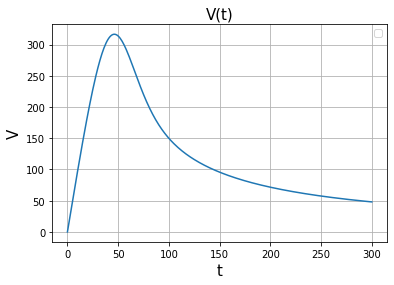

In [409]:
"""
Si se desean ver las otras graficas solo es necesario cambiar -lista[0][:,1] por un -lista[i][:,1] con i que varia de 0,1,2,3,4
"""
plt.plot(t, -lista[0][:,1]) #velocidad respecto al tiempo
plt.title("V(t)", size = 15)
plt.legend()
plt.xlabel("t", size = 15)
plt.ylabel("V", size = 15)
plt.grid()

No handles with labels found to put in legend.


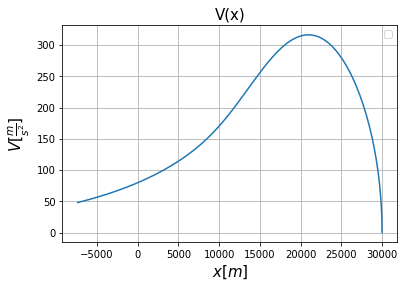

In [410]:
plt.plot(lista[0][:,0], -lista[0][:,1]) #posicion respecto a la velocidad
plt.title("V(x)", size = 15)
plt.legend()
plt.xlabel(r'$x [m]$', size = 15)
plt.ylabel(r'$V [\frac{m}{s^2}]$', size = 15)
plt.grid()

No handles with labels found to put in legend.


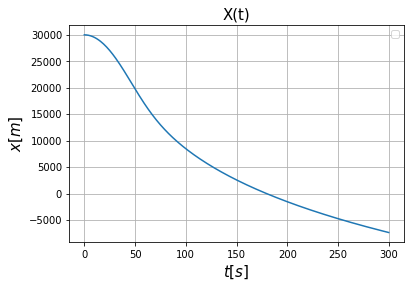

In [411]:
plt.plot(t, lista[0][:,0]) # posicion respecto al tiempo 
plt.title("X(t)", size = 15)
plt.legend()
plt.xlabel(r'$t [s]$', size = 15)
plt.ylabel(r'$x [m]$', size = 15)
plt.grid()

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + k_0v^2 exp(-y/\lambda)
$$
Despejando v obtenemos:

$$
v = \sqrt{\frac{g}{k_{0}}}e^{\frac{y}{2\lambda}}
$$

In [412]:
def v_edo(x0, params):
  p0 = params[0]
  A = params[1]
  delta = params[2]
  lamda = params[3]
  m = params[4]
  g = params[5]

  k0 = (p0 * A * delta)/(2 * m)

  y = x0
  dydt = np.sqrt(g/k0) * np.exp(y/(2*lamda)) # despejando v de la ecuacion
  return dydt

In [413]:
x0 = np.linspace(0, 70000, 70001) # posicion inicial 

g = 9.8 #m/s^2
p0 = 1.29 # kg/m^3
masa = 60 #kg
A = 0.3 # m^3
delta = 0.5
lamda = 7482.2 # m
params = (p0, A, delta, lamda, masa, g) # parametros para la funcion

v = v_edo(x0, params)

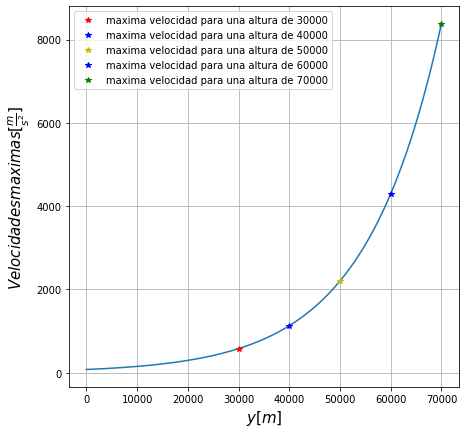

In [414]:
plt.figure(figsize=(7,7))
plt.plot(x0, v)
plt.plot(30000,578.7866366, "r*", label = "maxima velocidad para una altura de 30000")
plt.plot(40000,1129.1117711, "b*", label = "maxima velocidad para una altura de 40000") 
plt.plot(50000,2202.70011611, "y*", label = "maxima velocidad para una altura de 50000") 
plt.plot(60000,4297.08371277, "b*", label = "maxima velocidad para una altura de 60000") 
plt.plot(70000,8382.86078961, "g*", label = "maxima velocidad para una altura de 70000") 
plt.xlabel(r'$y [m]$', size = 15)
plt.ylabel(r'$Velocidades maximas [\frac{m}{s^2}]$', size = 15)
plt.legend()
plt.grid()